In [43]:
import pandas as pd
import numpy as np

In [44]:
dataset=pd.read_csv("labeled_data.csv")

In [45]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [46]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [47]:
dataset['labels']=dataset['class'].map({0:"hate speech",
                                       1:"offensive language",
                                       2:"neither"})

In [48]:
data=dataset[["tweet",'labels']]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,neither
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",neither
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [49]:
#re-regression,nltk-national language ,stopwords-most common words like is they that 
import re
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
#stammers are bringing it into orginal from like using to use etc
stemmer=nltk.SnowballStemmer("english")

In [51]:
stopwords=set(stopwords.words("english"))

In [63]:
#cleaning data by eliminating all the words that are common and website links
import string
def clean(text):
    text=str(text).lower()
    text=re.sub('https://\s+www\.s+.','',text)
    text=re.sub('\[.*?\]','',text)
    text=re.sub('<.*?>','',text)
    text=re.sub('\n','',text)
    text=re.sub('\w*\d\w*','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)

    text=[word for word in text.split(' ') if word  not in stopwords]
    text=" ".join(text)
    #stemming
    text=[stemmer.stem(word) for word in text.split(" ")]
    text=" ".join(text)
    return text

In [64]:
data['tweet']= data['tweet'].apply(clean)

C:\Users\saket\AppData\Local\Temp\ipykernel_12372\2277899299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet']= data['tweet'].apply(clean)


In [65]:
data

,tweet,labels
0,rt mayasolov woman complain clean hous amp ma...,neither
1,rt boy dat coldtyga dwn bad cuffin dat hoe ...,offensive language
2,rt urkindofbrand dawg rt ever fuck bitch sta...,offensive language
3,rt cganderson vivaba look like tranni,offensive language
4,rt shenikarobert shit hear might true might f...,offensive language
...,...,...
24778,muthafin lie lifeask coreyemanuel right tl tr...,offensive language
24779,gone broke wrong heart babi drove redneck crazi,neither
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got wild bitch tellin lie,offensive language


In [67]:
x=np.array(data['tweet'])
y=np.array(data['labels'])

In [68]:
x,y


(array([' rt mayasolov woman complain clean hous amp man alway take trash',
        ' rt  boy dat coldtyga dwn bad cuffin dat hoe  place',
        ' rt urkindofbrand dawg rt  ever fuck bitch start cri confus shit',
        ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
        'youu got wild bitch tellin lie',
        'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll httptco'],
       dtype=object),
 array(['neither', 'offensive language', 'offensive language', ...,
        'offensive language', 'offensive language', 'neither'],
       dtype=object))

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [71]:
cv=CountVectorizer()
x=cv.fit_transform(x)

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [76]:
#building ml module
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt=DecisionTreeClassifier()

In [78]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred=dt.predict(x_test)

In [83]:
from sklearn.metrics import confusion_matrix
cn=confusion_matrix(y_test,y_pred)

In [84]:
cn

array([[ 158,   47,  260],
       [  33, 1145,  201],
       [ 246,  228, 5861]], dtype=int64)

In [85]:
import seaborn as sns
import matplotlib.pyplot as ply

<Axes: >

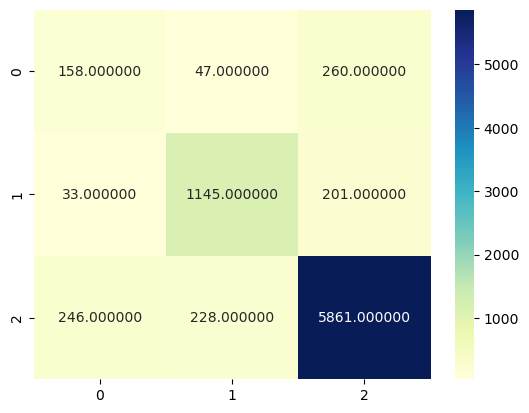

In [88]:
sns.heatmap(cn,annot=True,fmt='f',cmap="YlGnBu")

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8759016994742633

In [93]:
sample="lets kill everyone in the city"
sample=clean(sample)
sample

'let kill everyon citi'

In [95]:
dt1=cv.transform([sample]).toarray()

In [98]:
dt.predict(dt1)

array(['hate speech'], dtype=object)